# WEBSITE CLASSIFICATION:

# Objective:
The primary objective of this project is to classify different websites into various categories based on the extracted test(description of the website)

# The flow of the project is as below:

    *Reading the data in python
    *Cleaning the data and transform to be useful for basic analysis
    *Identifying the Target variable 
    *Basic Data exploration
    *Converting data to numeric for ML
    *Applying Machine Learning Models to the data
    *Evaluating accuracy of each model
    *Selecting the best model

# Steps:
    1. Importing Necessary Libraries
    2. Basic Data Exploration
        2.1 Dimensionality of the dataset
        2.2 Top 10 and last 10 records of Data
        2.3 Unique Labels of data
        2.4 Missing values
        2.5 Word count of description
        2.6 Char count of description
    3. Data Cleansing
        3.1 Removing unnecessary columns
        3.2 Converting text to lower
        3.3 Removing punctuation marks
        3.4 Removing Stopwords
        3.5 Removing Numbers
        3.6 Lemmetisation
    4. Data Exploartion and Visualisation after cleaning the data
        4.1 Trigrams
        4.2 Bigrams
        4.3 Unigrams
        4.4 Countplot
        4.5 WordClouds
    5. Implementing CountVectoriser and Splitting dataset into training set and testing set 
    6. Building Machine Learning Models
        6.1 Naive Bayes
            6.1.1 Evaluating Multinomial Naive Bayes Model (Accuracy and Classification Report)
        6.2 SVM
            6.2.1 Evaluating Support Vector Machine Model (Accuracy and Classification Report)
        6.3 Logistic Regression
            6.3.1 Evaluating Logistic Regression Model (Accuracy and Classification Report)
    7. Selecting best model
    8. Conclusion
    
    

# 1. Importing Necessary Libraries


In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize 
import string

from wordcloud import WordCloud,STOPWORDS

from sklearn.model_selection import train_test_split   

from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

# 2. Basic Data Exploration


In [187]:
# Reading the data set - csv format
website_classification_data=pd.read_csv("website_classification.csv")

## 2.1 Dimensionality of the website_classification_dataset

In [188]:
#Retrieving the dimensionality of the data frame
rows=website_classification_data.shape[0]
columns=website_classification_data.shape[1]
print(f"There are {rows} rows and {columns} columns in the given website_classification_dataset")

There are 1408 rows and 4 columns in the given website_classification_dataset


## 2.2 Top 10 and last 10 records of Data


In [189]:
#to show first ten rows of data
website_classification_data.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [190]:
#to show first last rows of data
website_classification_data.tail()

,Unnamed: 0,website_url,cleaned_website_text,Category
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult


## 2.3 Unique Labels of website_classification_data

In [191]:
website_classification_data['Category'].unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

## 2.4 Missing Values

In [192]:
(website_classification_data.isnull().sum() / len(website_classification_data))*100

Unnamed: 0              0.0
website_url             0.0
cleaned_website_text    0.0
Category                0.0
dtype: float64

## 2.5 Word count of description


In [193]:
website_classification_data['word_count'] = website_classification_data['cleaned_website_text'].apply(lambda x: len(str(x).split(" ")))
website_classification_data[['cleaned_website_text','word_count']].head(10)

,cleaned_website_text,word_count
0,official site good hotel accommodation big sav...,672
1,expedia hotel book sites like use vacation wor...,729
2,tripadvisor hotel book sites like previously d...,281
3,cheap flights search compare flights momondo f...,1273
4,bot create free account create free account si...,496
5,hotel reservations bundle save book flight sal...,342
6,official travel deals promotion choose million...,138
7,bot create free account create free account si...,398
8,bot create free account create free account si...,367
9,cheap hotels cars flights minute travel deals ...,23


## 2.6 Char count of description


In [194]:
website_classification_data['char_count'] = website_classification_data['cleaned_website_text'].str.len()
website_classification_data[['cleaned_website_text','char_count']].head(10)

,cleaned_website_text,char_count
0,official site good hotel accommodation big sav...,4848
1,expedia hotel book sites like use vacation wor...,4886
2,tripadvisor hotel book sites like previously d...,1969
3,cheap flights search compare flights momondo f...,9056
4,bot create free account create free account si...,3449
5,hotel reservations bundle save book flight sal...,2231
6,official travel deals promotion choose million...,990
7,bot create free account create free account si...,2701
8,bot create free account create free account si...,2536
9,cheap hotels cars flights minute travel deals ...,144


# 3. Data Cleansing


## 3.1 Removing unnecessary columns


In [195]:
website_classification_data.drop(['Unnamed: 0'], axis=1, inplace=True)
website_classification_data.head(10)

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449
5,https://book.priceline.com/?refid=8431&refclic...,hotel reservations bundle save book flight sal...,Travel,342,2231
6,https://www.trip.com/index?locale=en_us&allian...,official travel deals promotion choose million...,Travel,138,990
7,https://www.orbitz.com/,bot create free account create free account si...,Travel,398,2701
8,https://www.travelocity.com/,bot create free account create free account si...,Travel,367,2536
9,https://www.hotwire.com/,cheap hotels cars flights minute travel deals ...,Travel,23,144


## 3.2 Converting text to lower case


In [196]:
website_classification_data["cleaned_website_text"] = website_classification_data["cleaned_website_text"].str.lower()
website_classification_data.head()

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449


## 3.3 Removing punctuation marks


In [197]:
# Punctuation marks
punctuations = string.punctuation
def remove_punctuation(text):
    #To replace the punctuation marks with spaces.
    return text.translate(str.maketrans('', '', punctuations))
# applying Anonymous functions/Lambda Function to evaluate the expression "remove_punctuation" and return 
website_classification_data["cleaned_website_text"] = website_classification_data["cleaned_website_text"].apply(lambda text: remove_punctuation(text))
website_classification_data.head()

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449


## 3.4 Removing Stopwords


In [198]:
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    #Join all the words into one string if the words are not part of the defines stopwords.
    return " ".join([word for word in str(text).split() if word not in stopwords])
# applying Anonymous functions to remove stopwords for each and every row 
website_classification_data["cleaned_website_text"] = website_classification_data["cleaned_website_text"].apply(lambda text: remove_stopwords(text))
website_classification_data.head()

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449


## 3.5 Removing Numbers

In [199]:
#Remove Numbers
def remove_num(text):
    #Join the words into a string if they are not a digit.
    return ''.join(filter(lambda x: not x.isdigit(), text))
# applying Anonymous functions to remove numbers for each and every row 
website_classification_data["cleaned_website_text"] = website_classification_data["cleaned_website_text"].apply(lambda text: remove_num(text)) 
website_classification_data.head()

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449


## 3.6 Lemmetisation

In [200]:
"""Lemmatization - to convert a word to its base form.
    By lemmetisation, the different inflected forms of the word are considerd to be of a single form
    example - run, running, ran are considered as run"""

lemmatizer = WordNetLemmatizer()
#Set is created where parts of speech tag is the key  whose values are mapped with the value from wordnet dictionary. 
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    #assigning some specific token (Parts of Speech) to each word.
    pos_tagged_text = nltk.pos_tag(text.split())
    #returning string after lemmetising
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# applying Anonymous functions to lemmetise for each and every row 
website_classification_data["cleaned_website_text"] = website_classification_data["cleaned_website_text"].apply(lambda text: lemmatize_words(text))
website_classification_data.head()

,website_url,cleaned_website_text,Category,word_count,char_count
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,672,4848
1,https://travelsites.com/expedia/,expedia hotel book site like use vacation work...,Travel,729,4886
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book site like previously de...,Travel,281,1969
3,https://www.momondo.in/?ispredir=true,cheap flight search compare flight momondo fin...,Travel,1273,9056
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,496,3449


# 4. Data Exploaration and Visualisation after Cleaning the website_classification_data

In [201]:
#Function for n-grams - TO find most commonly occuring words together.
def n_grams(i,j):
    #To convert the text into vector based on the frequency of its occurance
    count_vectoriser = CountVectorizer(ngram_range=(i,j))
    #To tranform our records into document term matrix (matrix representation with various terms as columns and each sentence of data set as matrix row)
    ngrams = count_vectoriser.fit_transform(website_classification_data["cleaned_website_text"])
    #To count the frequency (Number of occurences of the terms together)
    count_values = ngrams.toarray().sum(axis=0)
    #Vocabulary - identified Unique words along with their indices
    vocab = count_vectoriser.vocabulary_
    #To return frequency and words that occur the most together 
    return count_values,vocab

## 4.1 Trigrams
(Most frequently occuring three words together)

In [202]:
count_values,vocab=n_grams(3,3)
#Sorting the frequency (descendind order) and converting to a dataframe
website_classification_dataset_trigrams = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Frequency', 1:'Trigrams'})


In [203]:
website_classification_dataset_trigrams.head(0)

,Frequency,Trigrams


In [204]:
website_classification_dataset_trigrams.sample(5)

,Frequency,Trigrams
614272,1,division facilitate specialize
461434,1,levine david lukens
448416,1,look property aggressive
651312,1,copernicium nihonium flerovium
45009,2,vellore vijayawada virar


## 4.2 Bigrams
(Most frequently occuring two words together)

In [205]:
count_values,vocab=n_grams(2,2)
#Sorting the frequency (descendind order) and converting to a dataframe
website_classification_dataset_bigrams = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Frequency', 1:'Bigrams'})

In [206]:
website_classification_dataset_bigrams.head(3)

,Frequency,Bigrams
0,971,late news
1,873,privacy policy
2,813,add cart


In [207]:
website_classification_dataset_bigrams.sample(5)

,Frequency,Bigrams
98521,2,read press
258161,1,scarves sock
349150,1,meat content
549671,1,answer personal
176305,1,wonder designer


## 4.3 Top 20  most frequently occuring words (unigrams)

In [208]:
#split the sentence into list and then count each of its occurance
frequency_of_words = pd.Series(' '.join(website_classification_data["cleaned_website_text"]).split()).value_counts()[:20]
frequency_of_words

news        5332
new         5093
read        2992
world       2907
home        2808
time        2761
december    2699
video       2695
good        2681
service     2626
game        2593
free        2572
view        2487
day         2481
late        2442
recipe      2348
year        2328
sport       2284
online      2282
contact     2208
dtype: int64

## 4.4 Count of the each category of the website_classification_dataset

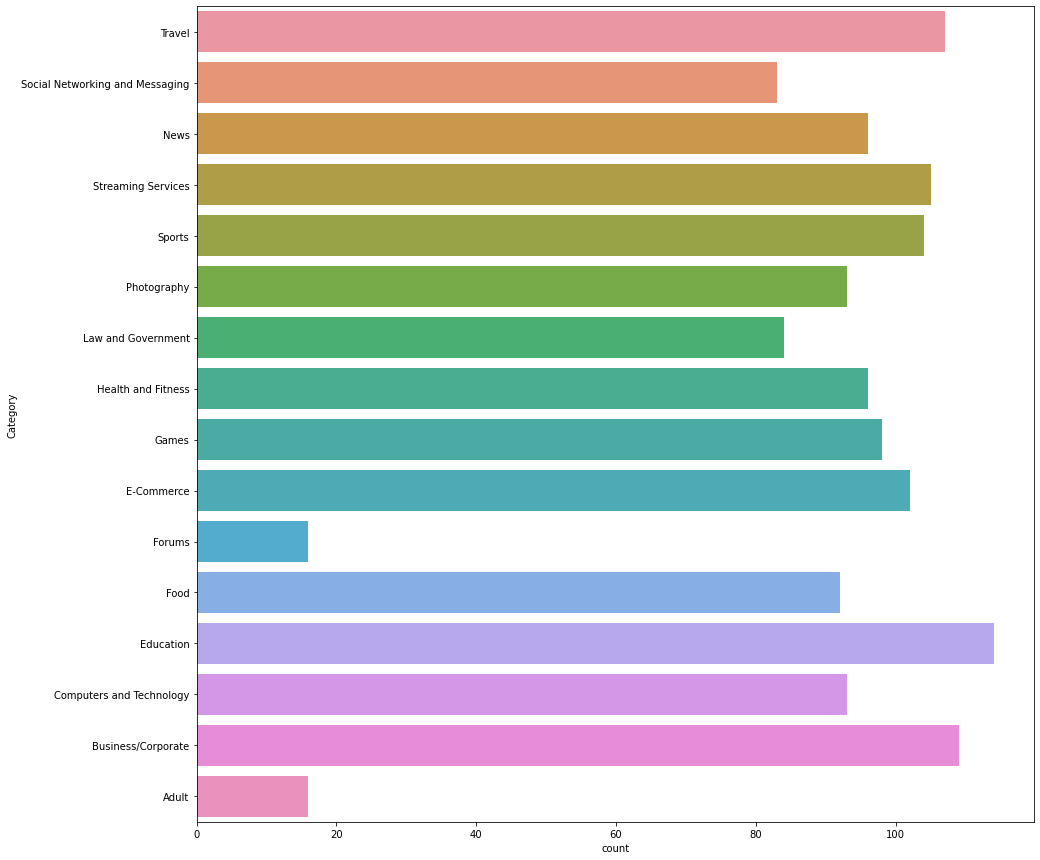

In [209]:
plt.figure(figsize = (15,15))
sns.countplot(y='Category',data=website_classification_data)  
plt.show()  

## 4.5 Wordcloud for each Category 

In [210]:
#Wordcloud - TO visualise most frequent terms
plt.figure(figsize=(650,650))
travel_category = website_classification_data[website_classification_data['Category']=='Travel']
text = travel_category.cleaned_website_text.values

<Figure size 46800x46800 with 0 Axes>

In [211]:
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

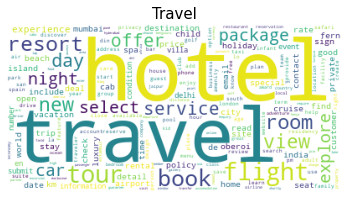

In [212]:
plt.axis('off')
plt.title("Travel",fontsize=15)
plt.imshow(wordcloud_for_travel)

In [213]:
plt.figure(figsize=(650,650))
food_category = website_classification_data[website_classification_data['Category']=='Food']
text = food_category.cleaned_website_text.values

<Figure size 46800x46800 with 0 Axes>

In [214]:
wordcloud_for_food=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

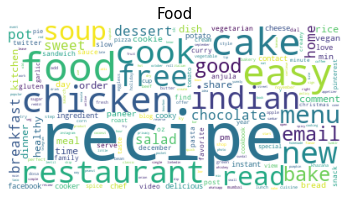

In [215]:
plt.axis('off')
plt.title("Food",fontsize=15)
plt.imshow(wordcloud_for_food)

In [216]:
plt.figure(figsize=(650,650))
educational_category = website_classification_data[website_classification_data['Category']=='Education']
text = educational_category.cleaned_website_text.values

<Figure size 46800x46800 with 0 Axes>

In [217]:
wordcloud_for_education=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

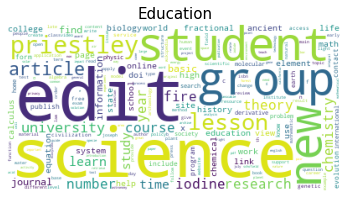

In [218]:
plt.axis('off')
plt.title("Education",fontsize=15)
plt.imshow(wordcloud_for_education)

In [219]:
plt.figure(figsize=(1500,800))
business_category = website_classification_data[website_classification_data['Category']=='Business/Corporate']
text = business_category.cleaned_website_text.values

<Figure size 108000x57600 with 0 Axes>

In [220]:
wordcloud_for_business=WordCloud(background_color='white',collocations=False).generate(" ".join(text))

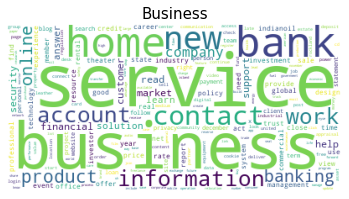

In [221]:
plt.axis('off')
plt.title("Business",fontsize=15)
plt.imshow(wordcloud_for_business)

*Similary wordclouds can be generated for each of the categories.

# 5. Implementing CountVectoriser and Splitting dataset into training set and testing set 

In [222]:
#x - Independent records of dataset
#y - Dependent records of dataset
counts = feature_extraction.text.CountVectorizer()
x = counts.fit_transform(website_classification_data['cleaned_website_text'].values)
x.shape

(1408, 54109)

In [223]:
y = website_classification_data['Category'].values

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 6. Building Machine Learning Models


## 6.1 Naive Bayes

In [225]:
model_naiveBayes = naive_bayes.MultinomialNB()
model_naiveBayes.fit(x_train, y_train)

MultinomialNB()

### 6.1.1 Evaluating Multinomial Naive Bayes Model (Accuracy and Classification Report)

In [226]:
model_naiveBayes.score(x_test, y_test)

0.8581560283687943

In [227]:
predictions_naiveBayes = model_naiveBayes.predict(x_test)

In [228]:
print(confusion_matrix(y_test, predictions_naiveBayes))

[[ 4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  5  1  0  0  1  1  0  2  1  0  0  0  0]
 [ 0  0 18  0  1  1  0  0  0  1  0  1  0  0  0  1]
 [ 0  0  0 29  0  0  0  0  1  0  1  1  0  0  0  0]
 [ 0  6  0  0 33  0  0  0  2  1  1  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  1  0  0  1  0  2]
 [ 0  0  2  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0 22  0  0  2  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 27  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  2 27  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  1 21  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0 27  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0 22]]


In [229]:
print(classification_report(y_test, predictions_naiveBayes))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.80      0.89         5
             Business/Corporate       0.79      0.68      0.73        34
       Computers and Technology       0.75      0.78      0.77        23
                     E-Commerce       0.83      0.91      0.87        32
                      Education       0.94      0.77      0.85        43
                           Food       0.92      0.85      0.88        27
                         Forums       0.00      0.00      0.00         4
                          Games       0.96      0.81      0.88        27
             Health and Fitness       0.85      1.00      0.92        22
             Law and Government       0.93      0.96      0.95        28
                           News       0.65      0.97      0.78        33
                    Photography       0.84      0.90      0.87        30
Social Networking and Messaging       1.00      0.

## 6.2 Support Vector Machine

In [230]:
model_svc = LinearSVC()
model_svc.fit(x_train, y_train)

LinearSVC()

### 6.2.1 Evaluating Support Vector Machine Model (Accuracy and Classification Report)

In [231]:
model_svc.score(x_test, y_test)

0.8108747044917257

In [232]:
predictions_svc = model_svc.predict(x_test)
print(confusion_matrix(y_test, predictions_svc))


[[ 3  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  3  2  0  0  0  0  0  0  1  1  1  0  0  1]
 [ 0  1 17  0  0  0  0  1  0  0  0  2  1  0  1  0]
 [ 0  1  0 28  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  2  1  0 31  1  1  2  1  0  1  0  3  0  0  0]
 [ 0  0  0  1  0 25  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  1  0  0  0 21  0  0  0  0  2  0  2  0]
 [ 0  0  0  0  3  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0 24  0  0  1  0  0  1]
 [ 0  0  0  0  3  0  0  0  0  1 23  2  1  0  3  0]
 [ 0  0  2  0  0  0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1 21  0  3  0]
 [ 0  1  0  0  0  0  1  1  0  0  0  0  2 27  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1  0 28  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1 22]]


In [233]:
print(classification_report(y_test, predictions_svc))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.60      0.75         5
             Business/Corporate       0.78      0.74      0.76        34
       Computers and Technology       0.57      0.74      0.64        23
                     E-Commerce       0.88      0.88      0.88        32
                      Education       0.84      0.72      0.77        43
                           Food       0.93      0.93      0.93        27
                         Forums       0.33      0.25      0.29         4
                          Games       0.81      0.78      0.79        27
             Health and Fitness       0.90      0.86      0.88        22
             Law and Government       0.96      0.86      0.91        28
                           News       0.92      0.70      0.79        33
                    Photography       0.82      0.93      0.87        30
Social Networking and Messaging       0.64      0.

## 6.3 Logistic Regression


In [234]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(x_train, y_train)

LogisticRegression()

### 6.3.1 Evaluating Logistic Regression Model (Accuracy and Classification Report)

In [235]:
model_logistic_regression.score(x_test, y_test)

0.8392434988179669

In [236]:
predictions_logistic_regression = model_logistic_regression.predict(x_test)
print(confusion_matrix(y_test, predictions_logistic_regression))


[[ 0  0  1  1  0  0  0  0  1  0  0  0  0  0  2  0]
 [ 0 28  2  1  0  0  0  0  0  0  0  2  0  0  0  1]
 [ 0  0 19  0  0  0  0  1  0  0  0  1  1  0  1  0]
 [ 0  0  1 28  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  3  2  0 35  0  0  1  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0 26  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0 21  0  0  0  0  4  0  1  0]
 [ 0  0  1  0  2  0  0  0 18  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0 26  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  0  0  0  1 26  2  1  0  1  0]
 [ 0  0  2  0  0  0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1 21  0  3  0]
 [ 0  1  0  0  0  0  0  0  0  0  2  0  1 29  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1 28  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1 22]]


In [237]:
print(classification_report(y_test, predictions_logistic_regression))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         5
             Business/Corporate       0.85      0.82      0.84        34
       Computers and Technology       0.56      0.83      0.67        23
                     E-Commerce       0.93      0.88      0.90        32
                      Education       0.90      0.81      0.85        43
                           Food       1.00      0.96      0.98        27
                         Forums       0.00      0.00      0.00         4
                          Games       0.84      0.78      0.81        27
             Health and Fitness       0.90      0.82      0.86        22
             Law and Government       0.96      0.93      0.95        28
                           News       0.93      0.79      0.85        33
                    Photography       0.82      0.93      0.87        30
Social Networking and Messaging       0.70      0.

# 7. Selecting best model


* Since Multinomial Naive Bayes classification model gave highest accuray, we can consider it to be the better algorithm 
 for this website dataset.
* Futhermore, predictions made by Multinomial Naive Bayes algorithm are quick since probability can be easily computed and it can also be used to work with large records of data.

# 8. Conclusion

* After evaluating the accuracy all the three models, it can be consluded that Multinomial NaiveBayes Model worked the best on the dataset since it gave the highest accuracy.